In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
import dpkt
import numpy as np
import time
import brewer2mpl
import AttackAnalysis

from AttackAnalysis import compute_effective_rate
from analyze import compute_global_throughput, parse_file, removeOutliers, compute_tcp_opt_count
from read_conf import ReadHosts

reload(AttackAnalysis)

host_to_ip, ip_to_host = ReadHosts('../experiment_conf/experiment_oak.conf')
interval = 5
root_level = 'workdir/results-nping/'

## Counting the options

In [16]:
prefix='results-nping-'
capfile='servernode-log_agent-tcpdump.cap'
postfix='challenges-m17'
shost='servernode'
chost='clientnode-1'
verbose = True

#get pcap file    
post = postfix
filename = root_level + prefix + post
print "Generating throughput for %s" % filename
filename += '/' + capfile

start_time = time.time()
    
entry = compute_tcp_opt_count(filename, host_to_ip[chost])
end_time = time.time()
if verbose:
    print "Time taken is ", end_time - start_time

Generating throughput for workdir/results-nping/results-nping-challenges-m17
Time to read pcap file 0.000357151031494
Time taken is  39.6422579288


1511204588.3


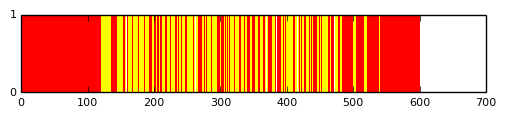

In [65]:
params = {
   'axes.labelsize': 9,
   'text.fontsize': 10,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [6, 1]
   }
plt.rcParams.update(params)

l_data_opt = []
l_ts_list = []

h_data_opt = []
h_ts_list = []
ts_min = min(entry.keys())
for ts in entry.keys():
    if entry[ts]==9:
        h_ts_list.append(ts-ts_min)
        h_data_opt.append(entry[ts]-8)
        #l_ts_list.append(ts-ts_min)
        #l_data_opt.append(0)
    else:
        l_ts_list.append(ts-ts_min)
        l_data_opt.append(entry[ts]-4)
        #h_ts_list.append(ts-ts_min)
        #h_data_opt.append(0)

print ts_min

size = 1
#plt.scatter(h_ts_list,h_data_opt, marker="s", color="yellow",s=size)
#plt.scatter(l_ts_list,l_data_opt, marker="|", color="red", s=size)

plt.bar(h_ts_list,h_data_opt, color="yellow", linewidth=0, width=1)
plt.bar(l_ts_list,l_data_opt, color="red", linewidth=0, width=1)

ax = plt.gca()
ax.set_yticks([0,1])

#ax.set_xlim(0,800)